In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pprint
from os import name
import xml.etree.ElementTree as et
import bs4
from lxml import html
from urllib.parse import urlencode, quote_plus, unquote

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [16]:
##### open API 활용 신청
# 공공데이터포털에서 보건복지부 코로나19 감염 현황 데이터 활용 신청하기

#인증키 입력
encoding = '발급받은 인코딩 인증키'
decoding = 'zWTt0X26Xp4zfjz1tOmJ1vAyE9q8NrY3mOZeMYxl0UNCD7wVs1Uo03DRjJOkMkoL8eE8h/Ajjxr7mUVf5ctTsg=='

# url 이해하기
"""
url : API명
serviceKey : 위 상세 페이지에서 발급받은 String 값
pageNo : 페이지 번호
numOfRows : 페이지 내 결과 수
startCreateDt : 검색시작일(YYYYMMDD)
endCreateDt : 검색종료일(YYYYMMDD)
"""

# 2022년 2월 코로나 데이터
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
params ={'serviceKey' : decoding, 
         'pageNo' : '1',
         'numOfRows' : '10',
         'startCreateDt' : '20210101',
         'endCreateDt' : '20211231' }

response = requests.get(url, params=params)
          
#xml 내용
content = response.text

#깔끔한 출력을 위한 코드
p=pprint.PrettyPrinter(indent=4)


In [17]:
### xml을 dataframe으로 변환하기


## 각 컬럼의 값
"""
SEQ : 게시글번호(국내 시도별 발생현황 고유값)
CREATE_DT: 	등록일시분초
DEATH_CNT: 	사망자 수
GUBUN: 	시도명(한글)
GUBUN_CN: 	시도명(중국어)
gubunEn: 시도명(영어)
INC_DEC: 전일대비 증감 수
ISOL_CLEAR_CNT: 격리 해제 수
QUR_RATE: 10만명당 발생률
STD_DAY: 기준일시
UPDATE_DT: 수정일시분초
DEF_CNT: 확진자 수
ISOL_ING_CNT: 격리중 환자수
OVER_FLOW_CNT: 해외유입 수
LOCAL_OCC_CNT: 지역발생 수
"""

#bs4 사용하여 item태그 분리
xml_obj = bs4.BeautifulSoup(content,'lxml-xml')
rows = xml_obj.findAll('item')
print(rows)

[<item><createDt>2021-12-31 09:06:59.806</createDt><deathCnt>16</deathCnt><defCnt>6754</defCnt><gubun>검역</gubun><gubunCn>隔離區</gubunCn><gubunEn>Lazaretto</gubunEn><incDec>26</incDec><isolClearCnt>6459</isolClearCnt><localOccCnt>0</localOccCnt><overFlowCnt>26</overFlowCnt><qurRate>-</qurRate><seq>14221</seq><stdDay>2021년 12월 31일 00시</stdDay><updateDt>null</updateDt></item>, <item><createDt>2021-12-31 09:06:59.805</createDt><deathCnt>13</deathCnt><defCnt>4638</defCnt><gubun>제주</gubun><gubunCn>济州</gubunCn><gubunEn>Jeju</gubunEn><incDec>16</incDec><isolClearCnt>4408</isolClearCnt><localOccCnt>14</localOccCnt><overFlowCnt>2</overFlowCnt><qurRate>687</qurRate><seq>14220</seq><stdDay>2021년 12월 31일 00시</stdDay><updateDt>null</updateDt></item>, <item><createDt>2021-12-31 09:06:59.805</createDt><deathCnt>91</deathCnt><defCnt>20678</defCnt><gubun>경남</gubun><gubunCn>庆南</gubunCn><gubunEn>Gyeongsangnam-do</gubunEn><incDec>231</incDec><isolClearCnt>18135</isolClearCnt><localOccCnt>228</localOccCnt><ov

In [18]:
# 각 행의 컬럼, 이름, 값을 가지는 리스트 만들기
row_list = [] # 행값
name_list = [] # 열이름값
value_list = [] #데이터값

# xml 안의 데이터 수집
for i in range(0, len(rows)):
    columns = rows[i].find_all()
    #첫째 행 데이터 수집
    for j in range(0,len(columns)):
        if i ==0:
            # 컬럼 이름 값 저장
            name_list.append(columns[j].name)
        # 컬럼의 각 데이터 값 저장
        value_list.append(columns[j].text)
    # 각 행의 value값 전체 저장
    row_list.append(value_list)
    # 데이터 리스트 값 초기화
    value_list=[]

In [19]:
#xml값 DataFrame으로 만들기
corona_df = pd.DataFrame(row_list, columns=name_list)
print(corona_df.head(19))

                   createDt deathCnt  defCnt gubun gubunCn            gubunEn  \
0   2021-12-31 09:06:59.806       16    6754    검역     隔離區          Lazaretto   
1   2021-12-31 09:06:59.805       13    4638    제주      济州               Jeju   
2   2021-12-31 09:06:59.805       91   20678    경남      庆南   Gyeongsangnam-do   
3   2021-12-31 09:06:59.805      161   15315    경북      庆北   Gyeongsangbuk-do   
4   2021-12-31 09:06:59.805       37    6078    전남      全南       Jeollanam-do   
5   2021-12-31 09:06:59.805      105    9568    전북      全北       Jeollabuk-do   
6   2021-12-31 09:06:59.804      144   18095    충남      忠南  Chungcheongnam-do   
7   2021-12-31 09:06:59.804      109   11498    충북      忠北  Chungcheongbuk-do   
8   2021-12-31 09:06:59.804      102   12405    강원      江原         Gangwon-do   
9   2021-12-31 09:06:59.804     1822  186363    경기      京畿        Gyeonggi-do   
10  2021-12-31 09:06:59.803        4    2142    세종      世宗             Sejong   
11  2021-12-31 09:06:59.803 

In [20]:
### 필요없는 데이터 삭제
# 열 기준 삭제는 axis=1, 원래 df를 그대로 사용하려면 inplace=True 사용
corona_sample = corona_df.drop(['createDt', 'gubunCn', 'gubunEn', 'seq', 'updateDt'], axis=1)
corona_sample

,deathCnt,defCnt,gubun,incDec,isolClearCnt,localOccCnt,overFlowCnt,qurRate,stdDay
0,16,6754,검역,26,6459,0,26,-,2021년 12월 31일 00시
1,13,4638,제주,16,4408,14,2,687,2021년 12월 31일 00시
2,91,20678,경남,231,18135,228,3,619,2021년 12월 31일 00시
3,161,15315,경북,105,13377,103,2,580,2021년 12월 31일 00시
4,37,6078,전남,60,5363,58,2,328,2021년 12월 31일 00시
...,...,...,...,...,...,...,...,...,...
6930,5,566,전남,6,474,6,0,30.35,2021년 01월 01일 00시
6931,62,2448,경북,24,1900,24,0,91.94,2021년 01월 01일 00시
6932,4,1360,경남,35,1041,34,1,40.46,2021년 01월 01일 00시
6933,0,421,제주,5,219,5,0,62.77,2021년 01월 01일 00시


In [21]:
corona_sample.rename(columns={'deathCnt':'사망자 수', 
                              'defCnt':'확진자 수',
                              'gubun':'시도명',
                              'incDec':'전일 대비 증감 수',
                              'isolClearCnt':'격리중 환자수', 
                              'localOccCnt':'지역발생 수',
                              'overFlowCnt':'해외유입 수',
                              'qurRate':'10만명당 발생률',
                              'stdDay':'기준일시'}, inplace=True)
corona_sample.columns

Index(['사망자 수', '확진자 수', '시도명', '전일 대비 증감 수', '격리중 환자수', '지역발생 수', '해외유입 수',
       '10만명당 발생률', '기준일시'],
      dtype='object')

In [22]:
corona_sample.head()

,사망자 수,확진자 수,시도명,전일 대비 증감 수,격리중 환자수,지역발생 수,해외유입 수,10만명당 발생률,기준일시
0,16,6754,검역,26,6459,0,26,-,2021년 12월 31일 00시
1,13,4638,제주,16,4408,14,2,687,2021년 12월 31일 00시
2,91,20678,경남,231,18135,228,3,619,2021년 12월 31일 00시
3,161,15315,경북,105,13377,103,2,580,2021년 12월 31일 00시
4,37,6078,전남,60,5363,58,2,328,2021년 12월 31일 00시


In [9]:
corona_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6935 entries, 0 to 6934
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사망자 수       6935 non-null   object
 1   확진자 수       6935 non-null   object
 2   시도명         6935 non-null   object
 3   전일 대비 증감 수  6935 non-null   object
 4   격리중 환자수     6935 non-null   object
 5   지역발생 수      6935 non-null   object
 6   해외유입 수      6935 non-null   object
 7   10만명당 발생률   6935 non-null   object
 8   기준일시        6935 non-null   object
dtypes: object(9)
memory usage: 487.7+ KB


In [23]:
# 데이터 전처리
corona_sample['기준일시']

0       2021년 12월 31일 00시
1       2021년 12월 31일 00시
2       2021년 12월 31일 00시
3       2021년 12월 31일 00시
4       2021년 12월 31일 00시
              ...        
6930    2021년 01월 01일 00시
6931    2021년 01월 01일 00시
6932    2021년 01월 01일 00시
6933    2021년 01월 01일 00시
6934    2021년 01월 01일 00시
Name: 기준일시, Length: 6935, dtype: object

In [24]:
month = []
day = []

# split함수 이용 월/일 나누기
for data in corona_sample['기준일시']:
    month.append(data.split(" ")[1][0:2])
    day.append(data.split(" ")[2][0:2])

In [25]:
#데이터프레임에 column생성해서 month, day 데이터 가져오기, 기준일시 삭제
corona_sample['월']=month
corona_sample['일']=day
corona_sample.drop(['기준일시'], axis=1, inplace=True)
corona_sample.head()

,사망자 수,확진자 수,시도명,전일 대비 증감 수,격리중 환자수,지역발생 수,해외유입 수,10만명당 발생률,월,일
0,16,6754,검역,26,6459,0,26,-,12,31
1,13,4638,제주,16,4408,14,2,687,12,31
2,91,20678,경남,231,18135,228,3,619,12,31
3,161,15315,경북,105,13377,103,2,580,12,31
4,37,6078,전남,60,5363,58,2,328,12,31


In [26]:
corona_sample=corona_sample.astype({'월':'int64', '일':'int64', '지역발생 수':'int64'})
corona_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6935 entries, 0 to 6934
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사망자 수       6935 non-null   object
 1   확진자 수       6935 non-null   object
 2   시도명         6935 non-null   object
 3   전일 대비 증감 수  6935 non-null   object
 4   격리중 환자수     6935 non-null   object
 5   지역발생 수      6935 non-null   int64 
 6   해외유입 수      6935 non-null   object
 7   10만명당 발생률   6935 non-null   object
 8   월           6935 non-null   int64 
 9   일           6935 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 541.9+ KB


In [29]:
#지역으로 묶기
local_corona=corona_sample.groupby('시도명').sum()
local_corona

,지역발생 수,월,일
시도명,,,
강원,10970,2382,5738
검역,8,2382,5738
경기,169175,2382,5738
경남,18987,2382,5738
경북,12523,2382,5738
광주,6739,2382,5738
대구,15062,2382,5738
대전,11297,2382,5738
부산,22813,2382,5738


<AxesSubplot:ylabel='시도명'>

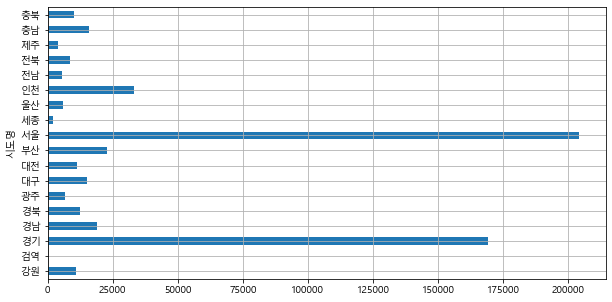

In [31]:
local_corona['지역발생 수'][0:18].plot(kind='barh', figsize=(10,5), grid=True)